# Scenario discovery - replication assignment
In this exercise, you will replicate the results from three influential papers in the field of decision-making under uncertainty. By working through these cases, you will gain hands-on experience in applying the **Patient Rule Induction Method (PRIM)** to 
* identify policy vulnerabilities
* develop Shared Socio-economic Pathways (SSPs), and
* design adaptive decision-making strategies.

Replicate the results found in:

1. [Bryant et al (2010)](https://doi.org/10.1016/j.techfore.2009.08.002), which introduces the "scenario discovery" approach.
2. [Rozenberg et al (2014)](https://doi.org/10.1007/s10584-013-0904-3), which proposes a "backwards" approach to SSP development.
3. [Hamarat et al (2013)](https://doi.org/10.1016/j.techfore.2012.10.004), which presents an iterative computational model-based approach for adaptive decision-making.

The data files are in the [data](data) folder and named in line with the papers. The full details for these papers can be found the course guide. Rozenberg et al and Hamarat et al are optional readings for these weeks. You can also look at [Kwakkel & Jaxa-Rozen (2016)](https://doi.org/10.1016/j.envsoft.2015.11.020), which gives a succinct summary of these three cases.

An additional useful, if dated, resource for Bryant et al is [Scenario discovery in Python](https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/) from the Water Programming blog.

You can use use the `%matplotlib notebook` [magic](http://ipython.readthedocs.io/en/stable/interactive/magics.html#magic-matplotlib) for interaction with the trade-off curves. You can revert back to inline with `%matplotlib inline`.

## 1. Bryant & Lempert
> Bryant and Lempert's ["Thinking inside the box"](https://doi.org/10.1016/j.techfore.2009.08.002) introduces "scenario discovery," a computer-assisted method for identifying policy vulnerabilities using statistical or data-mining algorithms on simulation data. The approach is demonstrated on a U.S. renewable energy policy problem, addressing challenges faced in public debates.

Load the data using pandas. The experiments are in **colums 2-10**, while the outcome is in column 15. If you look at the paper carefully, you will see that they change the `peel_alpha` in [PRIM](https://emaworkbench.readthedocs.io/en/latest/ema_documentation/analysis/prim.html). This controls the leniency of the algorithm.

<span style="color:red">
    
Follow the tutorial on [Scenario discovery in Python](https://waterprogramming.wordpress.com/2015/08/05/scenario-discovery-in-python/) from the Water Programming blog.

It comes with the [Jupyter NB](https://nbviewer.org/gist/quaquel/e7fc391970fa2d07798b)


</span>

In [38]:
from ema_workbench.analysis import prim
import pandas as pd

In [39]:
# Load the data from Bryant et al. (2010)
dir = "data/"
data = pd.read_csv(dir + "Bryant et al 2010.csv")

In [40]:
data.shape

(882, 16)

In [41]:
data.head()

,renew req %,Pricing,Cellulosic cost,Total biomass,Feedstock distribution,Cellulosic yield,Oil elasticity,Demand elasticity,Electricity coproduction,oil supply shift,Biomass backstop price,input record,Expen change,Incremental cost,Less than 10%,Greater than 90%
0,0.25,1,124.900002,612.799988,0.04,89.500000,0.206,-0.469,1.83,0.078,162.199997,1001,60.00,276.47,0,0
1,0.25,1,67.300003,837.200012,0.18,95.900002,0.277,-0.380,0.01,-0.032,150.300003,1002,19.42,85.07,0,0
2,0.25,1,71.000000,740.400024,0.80,83.500000,0.445,-0.778,0.25,-0.093,135.800003,1003,17.76,200.11,0,0
3,0.25,1,80.099998,995.599976,0.58,82.400002,0.291,-0.334,0.08,-0.086,98.800003,1004,37.88,130.86,0,0
4,0.25,1,76.400002,476.399994,0.79,97.500000,0.443,-0.205,1.59,0.073,163.500000,1006,66.13,180.11,0,0


<span style="color:red">
    
x: Columns 2-10 are uncertain variables used to define scenarios.

y: Columns 15 claasification of interesting scenarios (?).

</span>

In [42]:
x = data.iloc[:, 2:11] # input (uncertain) variables
y = data.iloc[:, 15] # output (outcome, kpi, metric) variable

In [43]:
# convert x and y to numpy array
#x = x.to_records()
#y = y.values

# no need to convert to numpy array, as prim can handle pandas dataframes

In [44]:
# Enable logging to display informative messages from ema_workbench during analysis
from ema_workbench import ema_logging
ema_logging.log_to_stderr(ema_logging.INFO);

<span style="color:red">
    
### PRIM (Patient Rule Induction Method) for Bryant et al's case

</span>

<span style="color:red">
    
* **The peeling alpha (peel_alpha)** determines how much data is peeled off in each iteration of the algorithm. The lower the value, the less data is removed in each iteration.
* **The minimium coverage threshold** that a box should meet is set to 0.8. Next, we can use the instantiated algorithm to find a first box.

</span>

In [54]:
# Create a PRIM (Patient Rule Induction Method)
prim_alg = prim.Prim(x, y, threshold=0.8, peel_alpha=0.1)

# Run the PRIM algorithm to find a "box" (a set of ranges for the input variables) 
# that best captures the cases of interest as defined by y.
box1 = prim_alg.find_box()

[MainProcess/INFO] 882 points remaining, containing 89 cases of interest
[MainProcess/INFO] mean: 1.0, mass: 0.05102040816326531, coverage: 0.5056179775280899, density: 1.0 restricted_dimensions: 6


<span style="color:red">
    
#### 

</span>

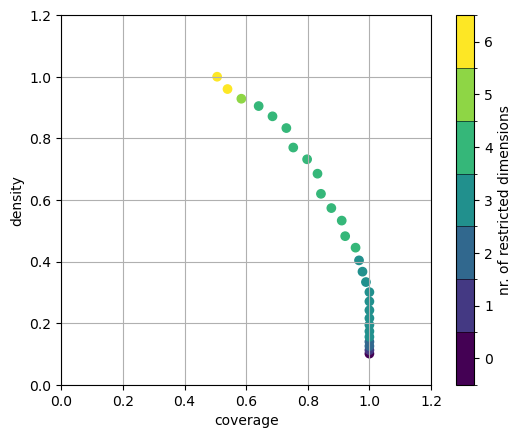

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

box1.show_tradeoff()
plt.grid(True)
plt.show()

<span style="color:red">
    
**Notes about number of restricted dimensions**
* ...
* ...


</span>

## 2. Rozenberg et al
> In ["Building SSPs for climate policy analysis,"](https://doi.org/10.1007/s10584-013-0904-3) Rozenberg et al. propose a "backwards" approach to develop Shared Socio-economic Pathways (SSPs) using potential drivers of mitigation and adaptation challenges. The method aids in focusing storylines on the most relevant driving forces.

* The experiments are the first seven columns. The remainder specify whether a given experiment belongs to a given SSP.
* Apply PRIM separately for each SSP
* you have to play with the threshold for each SSP, the default of 0.8 is at times too high
* if you look at the paper carefully, you will discover that they change some of the default parameters of PRIM

## 3. Hamarat et al
> Hamarat, Kwakkel, and Pruyt's ["Adaptive Robust Design under deep uncertainty"](https://doi.org/10.1016/j.techfore.2012.10.004) presents an iterative computational model-based approach for adaptive decision-making under uncertainty. The approach combines adaptive policy-making, simulation models, data mining, and robust optimization, with potential applications in long-term structural transformations.

This is the most difficult dataset to analyze with prim. It has been generated using the ema_workbench and can be loaded with the `load_results` function. Experiments are of interest if the end state for `'fraction renewables'` is lower than the initial value.

* PRIM struggles with finding a good explanation for this case, why?
* [Dalal et al (2013)](https://www.sciencedirect.com/science/article/pii/S1364815213001345) suggest using PCA preprocessing. The ema_workbench supports this with the `pca_preprocess` function. See also examples/prim_PCA_preprocess.py. Does PCA preprocessing makes a difference for this case?


In [ ]:
# To load the .gz file, you can use the load_results function
from ema_workbench import load_results
